## Carregar o dataset


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_receita_vendas = pd.read_csv('sales_data.csv')

In [3]:
df_receita_vendas.info()

<class 'pandas.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   tempo_de_experiencia  100 non-null    int64  
 1   numero_de_vendas      100 non-null    int64  
 2   fator_sazonal         100 non-null    int64  
 3   receita_em_reais      100 non-null    float64
dtypes: float64(1), int64(3)
memory usage: 3.3 KB


In [4]:
df_receita_vendas_eda = df_receita_vendas.copy()

In [5]:
df_receita_vendas_bucketing = df_receita_vendas.copy()

## EDA

In [50]:
df_receita_vendas_eda.head(10)

,tempo_de_experiencia,numero_de_vendas,fator_sazonal,receita_em_reais
0,36,21,5,2639.886941
1,74,44,10,4707.322227
2,38,44,4,5910.035131
3,52,62,6,6130.742546
4,97,56,2,7516.457681
5,67,70,10,1247.882324
6,119,69,2,3485.606208
7,66,62,2,2773.987427
8,68,96,3,4177.919578
9,106,42,2,4719.691069


In [51]:
# detectar valores ausentes
df_receita_vendas_eda.isna().sum()

tempo_de_experiencia    0
numero_de_vendas        0
fator_sazonal           0
receita_em_reais        0
dtype: int64

In [52]:
df_receita_vendas_eda.describe()

,tempo_de_experiencia,numero_de_vendas,fator_sazonal,receita_em_reais
count,100.000000,100.000000,100.000000,100.000000
mean,64.490000,54.490000,5.820000,5112.941924
std,32.397935,25.307201,2.836914,2544.731052
min,1.000000,10.000000,1.000000,1133.363948
25%,38.750000,37.500000,4.000000,2800.660516
50%,64.500000,52.500000,5.000000,4953.770034
75%,93.000000,70.500000,8.000000,7079.500163
max,119.000000,100.000000,10.000000,9941.016458


<Axes: xlabel='tempo_de_experiencia'>

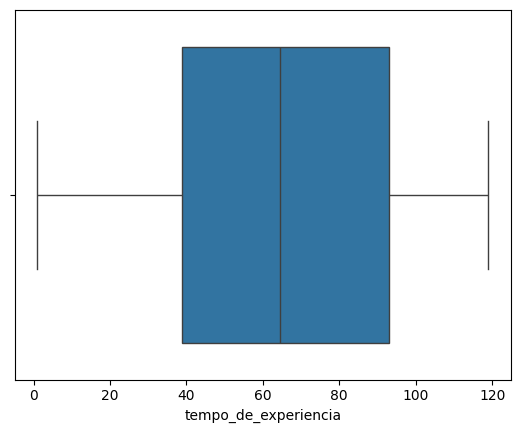

In [53]:
# verificar outliers
sns.boxplot(data=df_receita_vendas_eda, x='tempo_de_experiencia' )

<Axes: xlabel='numero_de_vendas'>

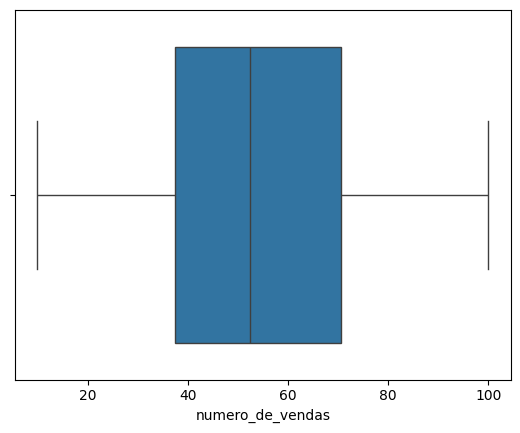

In [54]:
sns.boxplot(data=df_receita_vendas_eda, x='numero_de_vendas' )

<Axes: xlabel='fator_sazonal'>

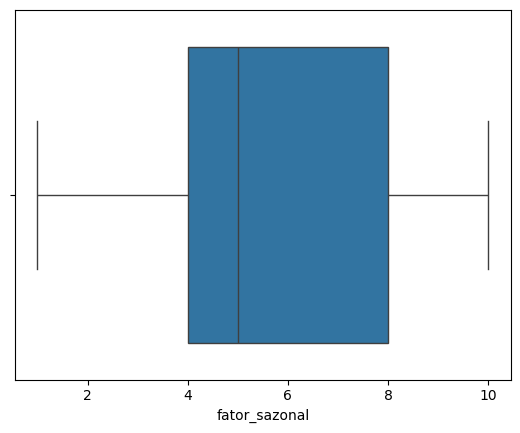

In [55]:
sns.boxplot(data=df_receita_vendas_eda, x='fator_sazonal' )

<Axes: xlabel='receita_em_reais'>

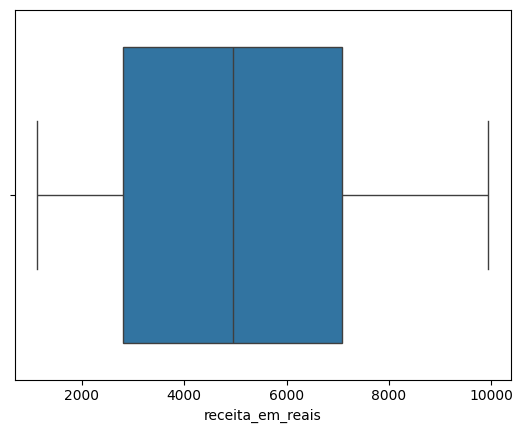

In [56]:
sns.boxplot(data=df_receita_vendas_eda, x='receita_em_reais' )

<Axes: xlabel='tempo_de_experiencia', ylabel='receita_em_reais'>

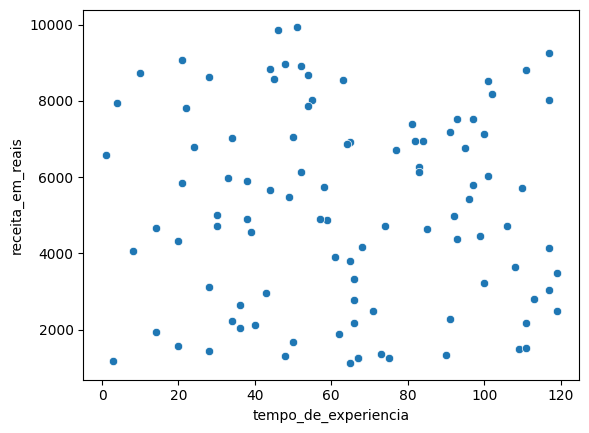

In [57]:
# Cruzamento variaveis numericas com receita_em_reais
sns.scatterplot(data=df_receita_vendas_eda, x='tempo_de_experiencia', y='receita_em_reais')

<Axes: xlabel='numero_de_vendas', ylabel='receita_em_reais'>

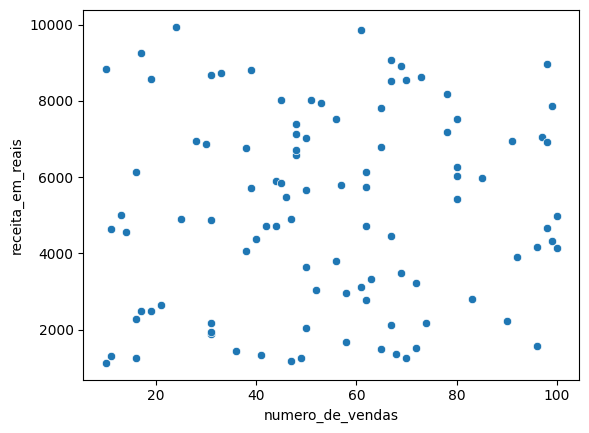

In [58]:
sns.scatterplot(data=df_receita_vendas_eda, x='numero_de_vendas', y='receita_em_reais')

<Axes: xlabel='fator_sazonal', ylabel='receita_em_reais'>

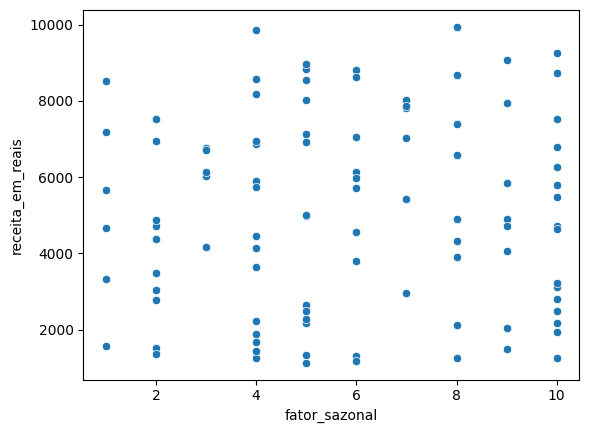

In [59]:
sns.scatterplot(data=df_receita_vendas_eda, x='fator_sazonal', y='receita_em_reais')

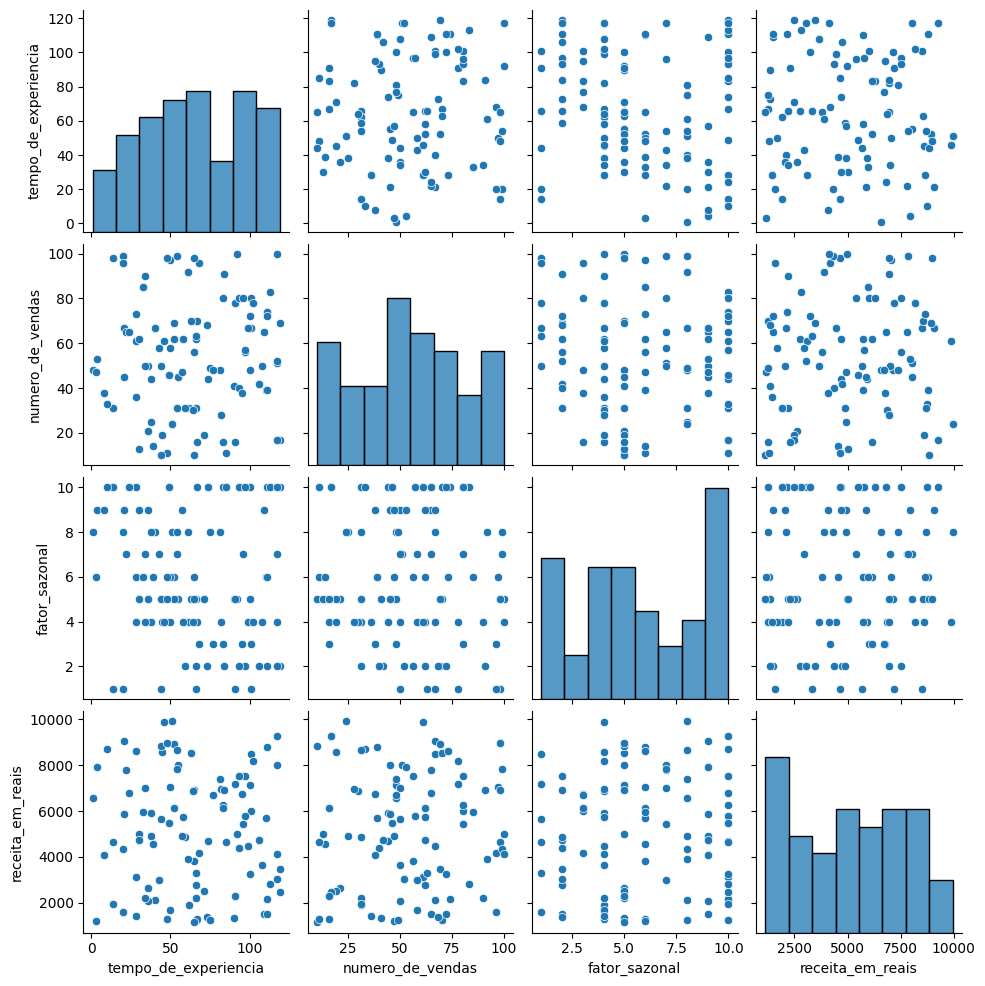

In [60]:
# histogramas

sns.pairplot(df_receita_vendas_eda)

<Axes: >

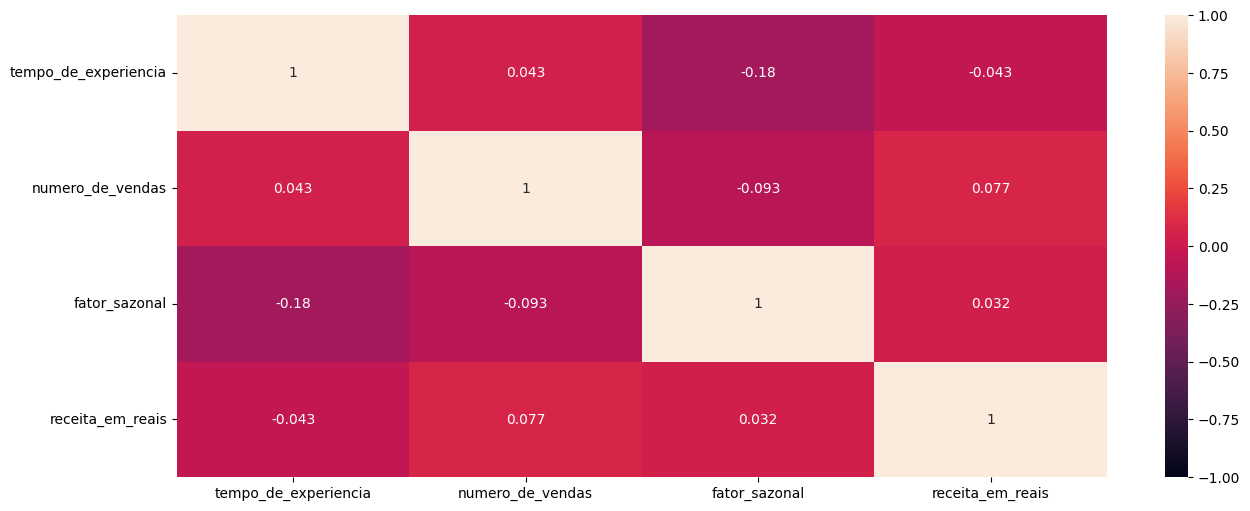

In [61]:
# mapa de calor
plt.figure(figsize=(15, 6))
sns.heatmap(df_receita_vendas_eda.corr(), annot=True, vmin=-1, vmax=1)

<Axes: >

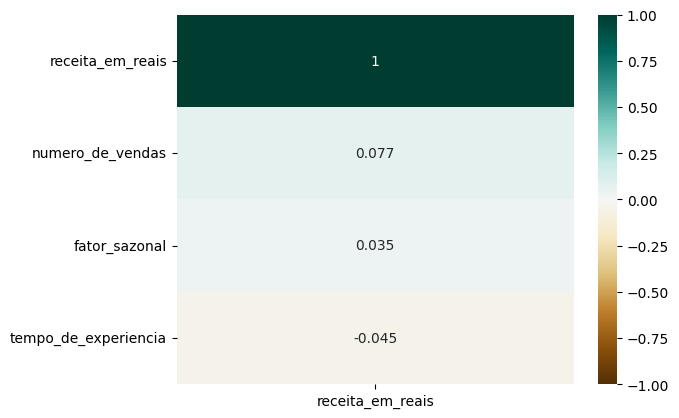

In [62]:
# Formato ranking 
sns.heatmap(df_receita_vendas_eda.corr('spearman')[['receita_em_reais']].sort_values(by='receita_em_reais', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')

In [63]:
#bucketing numero_de_vendas
bins_numero_de_vendas = [0, 10,20,30,40,50,60,70,80,90,100]
labels_numero_de_vendas = ['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100']
df_receita_vendas_bucketing['escala_numero_de_vendas'] = pd.cut(x=df_receita_vendas_bucketing['numero_de_vendas'], bins= bins_numero_de_vendas, labels=labels_numero_de_vendas, include_lowest=True)


In [64]:
df_receita_vendas_bucketing.head(20)

,tempo_de_experiencia,numero_de_vendas,fator_sazonal,receita_em_reais,escala_numero_de_vendas
0,36,21,5,2639.886941,21-30
1,74,44,10,4707.322227,41-50
2,38,44,4,5910.035131,41-50
3,52,62,6,6130.742546,61-70
4,97,56,2,7516.457681,51-60
5,67,70,10,1247.882324,61-70
6,119,69,2,3485.606208,61-70
7,66,62,2,2773.987427,61-70
8,68,96,3,4177.919578,91-100
9,106,42,2,4719.691069,41-50


<Axes: xlabel='escala_numero_de_vendas', ylabel='receita_em_reais'>

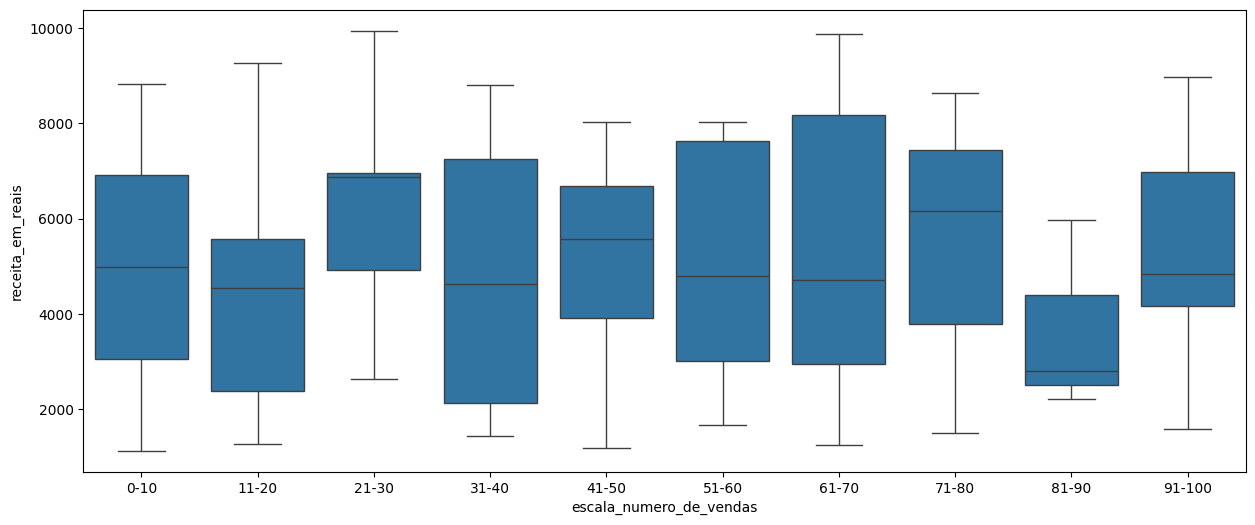

In [65]:
plt.figure(figsize=(15,6))
sns.boxplot(df_receita_vendas_bucketing, x='escala_numero_de_vendas', y='receita_em_reais')

### Treinar Modelo Linear

In [66]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, mean_squared_error, root_mean_squared_error

import numpy as np

In [67]:
# Criar Dataset de Treino e Teste
X = df_receita_vendas.drop(columns=['receita_em_reais'])
y = df_receita_vendas['receita_em_reais']

In [68]:
# Split dos dados
kf = KFold(n_splits=5, shuffle=True, random_state=51)

In [69]:
# Bloco para treinamento do modelo

# Pipeline
# Padronizar variaveis numericas - tempo_de_experiencia, numero_de_vendas

# Nomes das olunas

colunas_numericas = ['tempo_de_experiencia', 'numero_de_vendas']

# Transformer para colunas numericas
transformer_numericas = Pipeline(steps=[('scaler', StandardScaler())])

# Criar um ColumnTrasformer 
preprocessor = ColumnTransformer(
    transformers=[
        ('num', transformer_numericas,colunas_numericas)
    ]
)

# Criando o pipeline principal = Pré-Processamento + Treinamento
model_rgr = Pipeline(steps=[('preprocessor', preprocessor),
                            ('regressor', LinearRegression())])

# Armazenar MSE Treino e Teste   
mse_score_fold_train = []
mse_score_fold_test = []

#Armazenar R2 Score de Teste
r2score_fold_test = []

# Armazenar Residuos
residuos = []

# Armazenar as predições
y_pred_total = []

for train_index, test_index in kf.split(X):
    X_train, X_test =  X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # treinar o modelo
    model_rgr.fit(X_train, y_train)

    # Faça prediçoes nos conjuntos de treinamento e teste
    y_train_pred = model_rgr.predict(X_train)
    y_test_pred = model_rgr.predict(X_test)

    # Calcular metricas de MSE para os conjuntos de treinamento e teste
    mse_train = root_mean_squared_error(y_train, y_train_pred)
    mse_test = root_mean_squared_error(y_test, y_test_pred)

    # Carcular R2SCORE, RESIDUOS para os conjuntos teste
    r2score_test = r2_score(y_test, y_test_pred)
    residuos_test  = np.array(y_test - y_test_pred)

    # Armazena metricas da iteração nas listas
    mse_score_fold_train.append(mse_train)
    mse_score_fold_test.append(mse_test)
    r2score_fold_test.append(r2score_test)
    residuos.append(residuos_test)
    y_pred_total.append(y_test_pred)

mse_train_final = np.mean(mse_score_fold_train)
mse_test_final = np.mean(mse_score_fold_test)
r2score_test_final  = np.mean(r2score_fold_test)

percentual_mse_final  = ((mse_test_final - mse_train_final) / mse_train_final) * 100
residuos = np.array(residuos).reshape(-1)
y_pred_total = np.array(y_pred_total).reshape(-1)

### Analise de Metricas - Modelo Linear

In [70]:
# Metricas 
print(f'MSE Treino:  {mse_train_final}')
print(f'MSE Teste:  {mse_test_final}')
print(f'% Dif. MSE Treino e Teste : {percentual_mse_final}')
print(f'R2Score Teste:  {r2score_test_final}')

MSE Treino:  2506.4020236861
MSE Teste:  2646.215898584393
% Dif. MSE Treino e Teste : 5.578270108985637
R2Score Teste:  -0.13451763390799448


### Analise de Rediduos - Modelo Linear

In [71]:
# Transformar os residuos na escala padrao
# (X - media )/ desvio padrao
from scipy.stats import zscore
residuos_std = zscore(residuos)


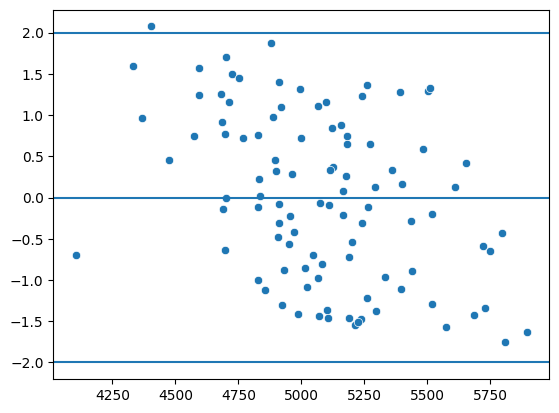

In [72]:
# verificar a linearidade dos residuos: Valores entre -2 e + 2 (Escala Padrao)
# Verificar a homocedasticidade: Valores em torno da reta sem nehuma tendencia ou formato

sns.scatterplot(x=y_pred_total, y=residuos_std)
plt.axhline(y=0)
plt.axhline(y=-2)
plt.axhline(y=2)


Text(0, 0.5, 'Resíduos na escala padrão')

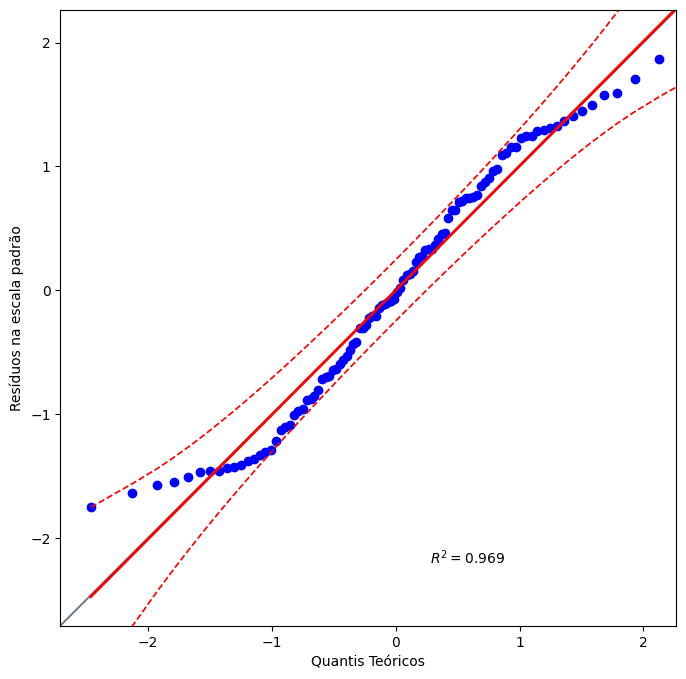

In [73]:
# Checar se residuos seguem uma distribuicao normal
import pingouin as pg
plt.figure(figsize=(14,8))
pg.qqplot(residuos_std, dist='norm', confidence=0.95)
plt.xlabel('Quantis Teóricos')
plt.ylabel('Resíduos na escala padrão')

### Treinamento Modelo Polimonial

In [74]:
# Importar Bibliotecas

from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, mean_squared_error

import numpy as np

In [81]:
# Bloco para treinamento do modelo

#graus_polynominal = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

graus_polynominal = [4]

rmse_train_values =[]
rmse_test_values = []
percentual_rmse_values =[]
r2score_test_values =[]

# Split usando KFold com 5 pastas/splits
kf = KFold(n_splits=5, shuffle=True, random_state=51)


for grau in graus_polynominal:

    # Pipeline
    # Padronizar variáveis numéricas - tempo_na_empresa, nivel_na_empresa

    # Nomes das olunas

    colunas_numericas = ['tempo_de_experiencia', 'numero_de_vendas']

    # Transformer para colunas numericas
    transformer_numericas = Pipeline(steps=[('scaler', StandardScaler())])

    # Criar um ColumnTrasformer 
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', transformer_numericas,colunas_numericas)
        ]
    )

    # Criar Features Polinomiais

    poly_feat = PolynomialFeatures(degree=grau, include_bias=False)



    # Criando o pipeline principal = Pré-Processamento + Treinamento
    model_poly = Pipeline(steps=[('preprocessor', preprocessor),
                                 ('poly_features', poly_feat),
                                 ('regressor', LinearRegression())])

    # Armazenar MSE Treino e Teste   
    rmse_score_fold_train = []
    rmse_score_fold_test = []

    #Armazenar R2 Score de Teste
    r2score_fold_test = []

    # Armazenar Residuos
    residuos = []

    # Armazenar as predições
    y_pred_total = []

    for train_index, test_index in kf.split(X):
        X_train, X_test =  X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        # treinar o modelo
        model_poly.fit(X_train, y_train)

        # Faça prediçoes nos conjuntos de treinamento e teste
        y_train_pred = model_poly.predict(X_train)
        y_test_pred = model_poly.predict(X_test)

        # Calcular metricas de MSE para os conjuntos de treinamento e teste
        rmse_train = root_mean_squared_error(y_train, y_train_pred)
        rmse_test = root_mean_squared_error(y_test, y_test_pred)

        # Carcular R2SCORE, RESIDUOS para os conjuntos teste
        r2score_test = r2_score(y_test, y_test_pred)
        residuos_test  = np.array(y_test - y_test_pred)

        # Armazena metricas da iteração nas listas
        rmse_score_fold_train.append(rmse_train)
        rmse_score_fold_test.append(rmse_test)
        r2score_fold_test.append(r2score_test)
        residuos.append(residuos_test)
        y_pred_total.append(y_test_pred)

    rmse_train_final = np.mean(mse_score_fold_train)
    rmse_test_final = np.mean(mse_score_fold_test)

    r2score_test_final  = np.mean(r2score_fold_test)
    percentual_rmse_final  = ((rmse_test_final - rmse_train_final) / rmse_train_final) * 100
    residuos = np.array(residuos).reshape(-1)

    y_pred_total = np.array(y_pred_total).reshape(-1)

    rmse_train_values.append(rmse_train_final)
    rmse_test_values.append(rmse_test_final)
    r2score_test_values.append(r2score_test_final)
    percentual_rmse_values.append(percentual_rmse_final)


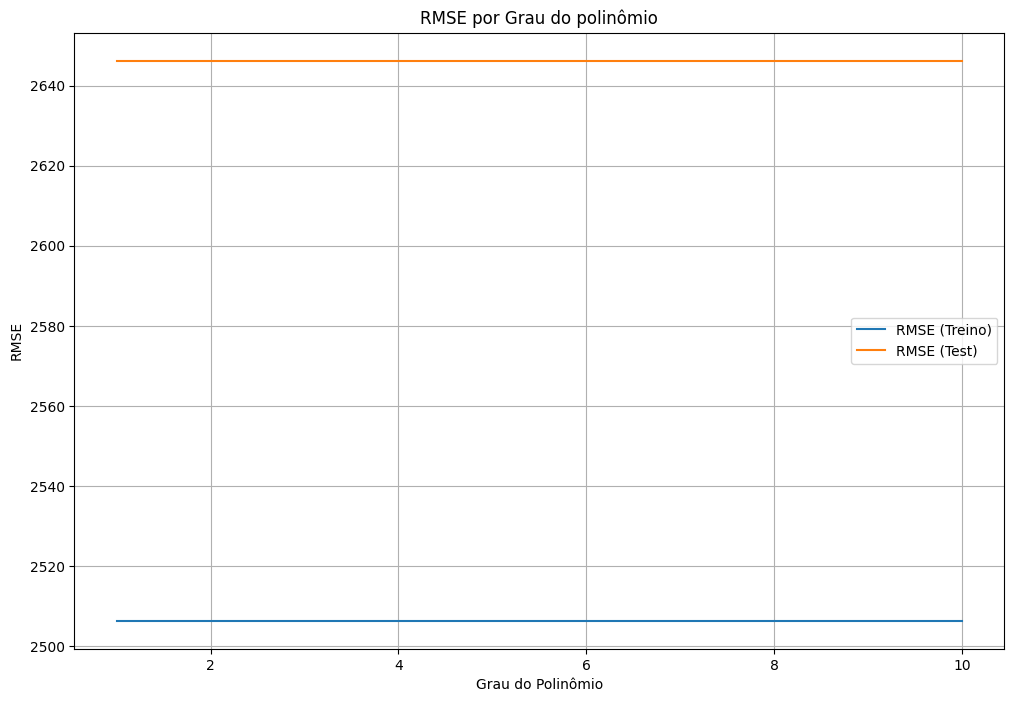

In [76]:
plt.figure(figsize=(12,8))
plt.plot(graus_polynominal, rmse_train_values, label='RMSE (Treino)')
plt.plot(graus_polynominal, rmse_test_values, label='RMSE (Test)')
plt.xlabel('Grau do Polinômio')
plt.ylabel('RMSE')
plt.title('RMSE por Grau do polinômio')
plt.legend()
plt.grid(True)
plt.show()

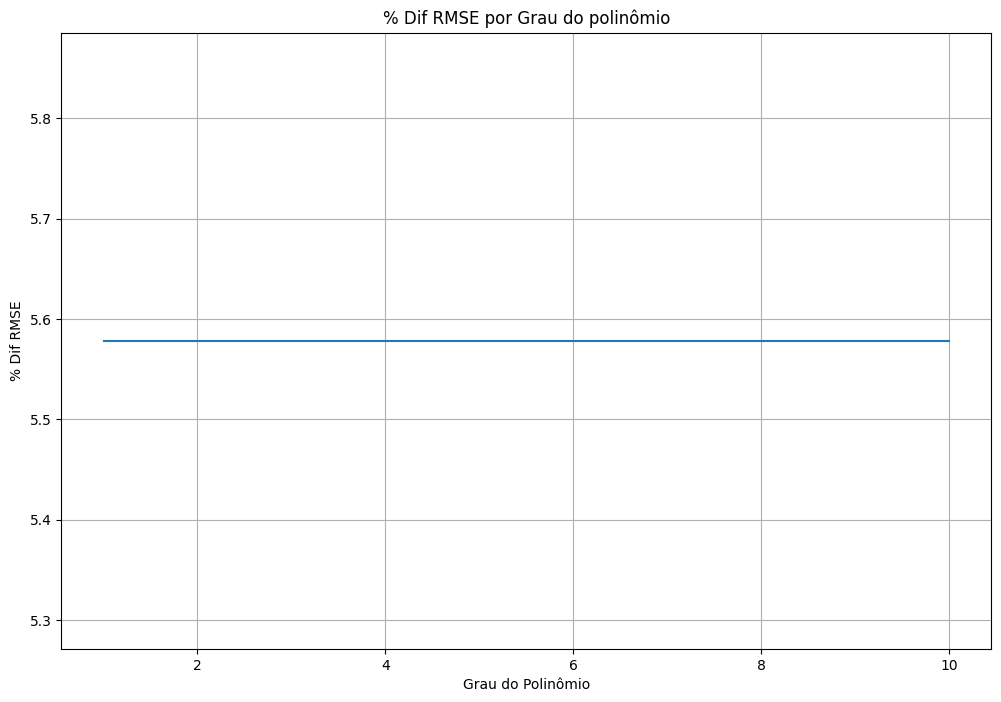

In [77]:
plt.figure(figsize=(12,8))
plt.plot(graus_polynominal, percentual_rmse_values, label='% Dif RMSE (Treino e Test)')
plt.xlabel('Grau do Polinômio')
plt.ylabel('% Dif RMSE')
plt.title('% Dif RMSE por Grau do polinômio')
plt.grid(True)
plt.show()

### Analise de Metricas - Modelo Polinomial

In [82]:
# Metricas 
print(f'MSE Treino:  {rmse_train_final}')
print(f'MSE Teste:  {rmse_test_final}')
print(f'% Dif. MSE Treino e Teste : {percentual_rmse_final}')
print(f'R2Score Teste:  {r2score_test_final}')

MSE Treino:  2506.4020236861
MSE Teste:  2646.215898584393
% Dif. MSE Treino e Teste : 5.578270108985637
R2Score Teste:  -0.540797064499067


### Analise de Rediduos - Modelo Polinomial

In [83]:
# Transformar os residuos na escala padrao
# (X - media )/ desvio padrao
from scipy.stats import zscore
residuos_std = zscore(residuos)


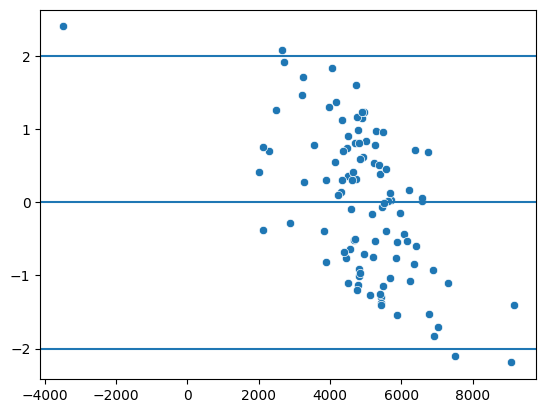

In [84]:
# verificar a linearidade dos residuos: Valores entre -2 e + 2 (Escala Padrao)
# Verificar a homocedasticidade: Valores em torno da reta sem nehuma tendencia ou formato

sns.scatterplot(x=y_pred_total, y=residuos_std)
plt.axhline(y=0)
plt.axhline(y=-2)
plt.axhline(y=2)

Text(0, 0.5, 'Resíduos na escala padrão')

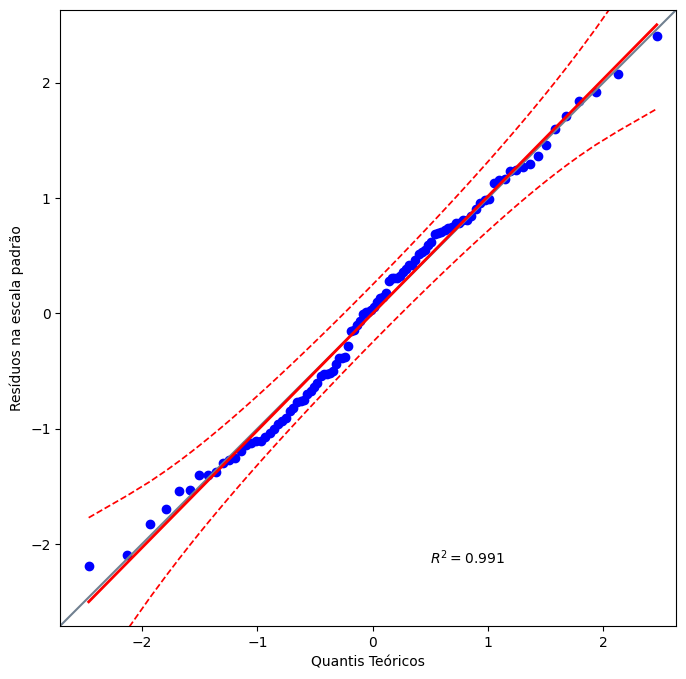

In [85]:
# Checar se residuos seguem uma distribuicao normal
import pingouin as pg
plt.figure(figsize=(14,8))
pg.qqplot(residuos_std, dist='norm', confidence=0.95)
plt.xlabel('Quantis Teóricos')
plt.ylabel('Resíduos na escala padrão')